In [107]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os, sys, glob
import numpy as np
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

In [187]:
x_data = np.load("data/res_process/test1/data30/x_train.npy")
y_data = np.load("data/res_process/test1/data30/y_train.npy")
y_label = np.load("data/res_process/test1/data30/y_train_label.npy")

In [188]:
x_data.shape, y_data.shape, y_label.shape

((33371, 625, 3), (33371,), (33371,))

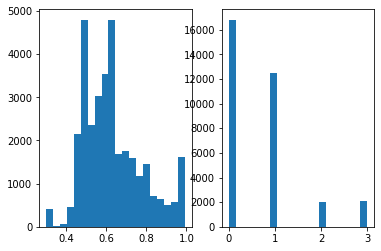

In [189]:
plt.subplot(1,2,1)
plt.hist(y_data, bins=20)
plt.subplot(1,2,2)
plt.hist(y_label, bins=20)
plt.show()

In [195]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_data, y_data, test_size=0.2, shuffle=True, random_state=34)
_, _, y_train_label, y_valid_label = train_test_split(x_data, y_label, test_size=0.2, shuffle=True, random_state=34)


In [223]:
def build_wavenet(x):

    xshape= x.shape

    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=[xshape[1], xshape[2]]))

    for rate in (1,2,4,8):
        model.add(layers.Conv1D(filters=20, kernel_size=2,
                                padding='causal', activation='relu', dilation_rate=rate))

    model.add(layers.AveragePooling1D(50, padding='same'))
    model.add(layers.Conv1D(20, 100, padding='same', activation='relu'))

    model.add(layers.Conv1D(10, 100, padding='same', activation='relu'))
    model.add(layers.AveragePooling1D(100, padding='same'))


    # Last layer - for label
    #model.add(layers.Conv1D(3, 10, padding='same'))
    #model.add(layers.AveragePooling1D(10, padding='same'))
    model.add(layers.Reshape((10, )))
    model.add(layers.Dense(10))
    model.add(layers.Activation('relu'))
    model.add(layers.Dense(1))
    #model.add(layers.Activation('softmax'))

    return model

In [224]:
model= build_wavenet(x_train)
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_61 (Conv1D)           (None, 625, 20)           140       
_________________________________________________________________
conv1d_62 (Conv1D)           (None, 625, 20)           820       
_________________________________________________________________
conv1d_63 (Conv1D)           (None, 625, 20)           820       
_________________________________________________________________
conv1d_64 (Conv1D)           (None, 625, 20)           820       
_________________________________________________________________
average_pooling1d_25 (Averag (None, 13, 20)            0         
_________________________________________________________________
conv1d_65 (Conv1D)           (None, 13, 20)            40020     
_________________________________________________________________
conv1d_66 (Conv1D)           (None, 13, 10)           

In [225]:
import tensorflow as tf
optimizer = tf.keras.optimizers.RMSprop(0.001)
loss='mse'
model.compile(optimizer, loss, metrics=['mae', 'mse'])

In [226]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model.fit(x_train, y_train, validation_data=[x_valid, y_valid], epochs=300,
         callbacks=[early_stop])

Train on 26696 samples, validate on 6675 samples
Epoch 1/10
26696/26696 [==============================] - 29s 1ms/sample - loss: 0.0205 - mae: 0.1011 - mse: 0.0205 - val_loss: 0.0098 - val_mae: 0.0708 - val_mse: 0.0098
Epoch 2/10
26696/26696 [==============================] - 29s 1ms/sample - loss: 0.0101 - mae: 0.0740 - mse: 0.0101 - val_loss: 0.0102 - val_mae: 0.0754 - val_mse: 0.0102
Epoch 3/10
26696/26696 [==============================] - 30s 1ms/sample - loss: 0.0087 - mae: 0.0679 - mse: 0.0087 - val_loss: 0.0082 - val_mae: 0.0653 - val_mse: 0.0082
Epoch 4/10
26696/26696 [==============================] - 38s 1ms/sample - loss: 0.0079 - mae: 0.0645 - mse: 0.0079 - val_loss: 0.0074 - val_mae: 0.0614 - val_mse: 0.0074
Epoch 5/10
26696/26696 [==============================] - 36s 1ms/sample - loss: 0.0072 - mae: 0.0607 - mse: 0.0072 - val_loss: 0.0074 - val_mae: 0.0617 - val_mse: 0.0074
Epoch 6/10
26696/26696 [==============================] - 33s 1ms/sample - loss: 0.0068 - mae: 0

In [227]:
y_pred = model.predict(x_valid)

In [228]:
y_pred

array([[0.6845869],
       [0.6148885],
       [0.9616015],
       ...,
       [0.589713 ],
       [0.5069804],
       [0.5192814]], dtype=float32)

In [229]:
for y, y_hat in zip(y_valid, y_pred[:200]):
    print(y, y_hat)

0.7708520116421442 [0.6845869]
0.6434526764861874 [0.6148885]
0.9590413923210935 [0.9616015]
0.8388490907372553 [0.8300586]
0.5563025007672873 [0.5520494]
0.7403626894942439 [0.6495128]
0.4913616938342727 [0.54945576]
0.5797835966168101 [0.5392681]
0.6434526764861874 [0.6462397]
0.6334684555795865 [0.7404833]
0.5185139398778874 [0.63941133]
0.6434526764861874 [0.64309853]
0.7708520116421442 [0.6185029]
0.5185139398778874 [0.5186175]
0.47712125471966244 [0.48420602]
0.4471580313422192 [0.54572666]
0.3010299956639812 [0.5296095]
0.6232492903979004 [0.6492319]
0.5797835966168101 [0.51888853]
0.6020599913279624 [0.57268006]
0.5185139398778874 [0.51871806]
0.4913616938342727 [0.53405917]
0.6127838567197355 [0.57565165]
0.6532125137753437 [0.64124185]
0.6020599913279624 [0.6465766]
0.5185139398778874 [0.5499023]
0.6989700043360189 [0.71068776]
0.7403626894942439 [0.7714247]
0.4913616938342727 [0.4917209]
0.5910646070264992 [0.6098393]
0.5185139398778874 [0.54618657]
0.6334684555795865 [0.616